## CabEdge Visualization Notebook

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import folium
import matplotlib.pyplot as plt

In [3]:
m = folium.Map(location=[45.5236, -122.6750])

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
import geopandas as gpd
from shapely.geometry import Point


In [6]:
complete_pickup_2018_df = pd.read_csv('/home/jupyter/capstone/database/complete_pickup_2018.csv')
complete_dropoff_2018_df = pd.read_csv('/home/jupyter/capstone/database/complete_dropoff_2018.csv')

In [7]:
zone_df = pd.read_csv('/home/jupyter/capstone/database/zone_df.csv')

In [8]:
complete_pickup_2018_df.head()

,Unnamed: 0,datetime,apparentTemperature,summary,windSpeed,PULocationID,pickup_year,pickup_month,pickup_day,pickup_hour,Count
0,0,2018-04-01 00:00:00,40.42,Clear,3.27,1.0,2018,4,1,0,0.0
1,1,2018-04-01 01:00:00,45.16,Clear,2.28,1.0,2018,4,1,1,0.0
2,2,2018-04-01 02:00:00,48.38,Clear,1.34,1.0,2018,4,1,2,0.0
3,3,2018-04-01 02:00:00,51.37,Clear,1.68,1.0,2018,4,1,2,0.0
4,4,2018-04-01 03:00:00,53.91,Clear,2.96,1.0,2018,4,1,3,0.0


In [9]:
zone_df.head()

,LocationID,Borough,Zone,service_zone,New_Name,Latitude,Longitude
0,1,EWR,Newark Airport,EWR,EWR_Newark_Airport,40.689064,-74.177255
1,2,Queens,Jamaica Bay,Boro Zone,Queens_Jamaica_Bay,40.603994,-73.835412
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone,Bronx_Allerton/Pelham_Gardens,40.862773,-73.843439
3,4,Manhattan,Alphabet City,Yellow Zone,Manhattan_Alphabet_City,40.725102,-73.979583
4,5,Staten Island,Arden Heights,Boro Zone,Staten_Island_Arden_Heights,40.556413,-74.173504


In [37]:
complete_pickup_2018_df['lat']= 0
complete_pickup_2018_df['lon']= 0

In [38]:
new_df = pd.DataFrame()
for zone in range(1,264):
    temp = complete_pickup_2018_df[complete_pickup_2018_df['PULocationID'] == zone]
    temp['lat'] = zone_df.iloc[zone-1,5]
    temp['lon'] = zone_df.iloc[zone-1,6]
    
    new_df = new_df.append(temp)
    

In [39]:
new_df.head()

,Unnamed: 0,datetime,apparentTemperature,summary,windSpeed,PULocationID,pickup_year,pickup_month,pickup_day,pickup_hour,Count,lat,lon
0,0,2018-04-01 00:00:00,40.42,Clear,3.27,1.0,2018,4,1,0,0.0,40.689064,-74.177255
1,1,2018-04-01 01:00:00,45.16,Clear,2.28,1.0,2018,4,1,1,0.0,40.689064,-74.177255
2,2,2018-04-01 02:00:00,48.38,Clear,1.34,1.0,2018,4,1,2,0.0,40.689064,-74.177255
3,3,2018-04-01 02:00:00,51.37,Clear,1.68,1.0,2018,4,1,2,0.0,40.689064,-74.177255
4,4,2018-04-01 03:00:00,53.91,Clear,2.96,1.0,2018,4,1,3,0.0,40.689064,-74.177255


In [40]:
new_df.tail()

,Unnamed: 0,datetime,apparentTemperature,summary,windSpeed,PULocationID,pickup_year,pickup_month,pickup_day,pickup_hour,Count,lat,lon
2303875,2303875,2018-09-30 19:00:00,54.16,Clear,4.43,263.0,2018,9,30,19,279.0,40.778007,-73.948202
2303876,2303876,2018-09-30 20:00:00,53.53,Clear,5.02,263.0,2018,9,30,20,208.0,40.778007,-73.948202
2303877,2303877,2018-09-30 21:00:00,52.96,Clear,4.77,263.0,2018,9,30,21,171.0,40.778007,-73.948202
2303878,2303878,2018-09-30 22:00:00,55.63,Clear,5.04,263.0,2018,9,30,22,135.0,40.778007,-73.948202
2303879,2303879,2018-09-30 23:00:00,57.95,Clear,5.36,263.0,2018,9,30,23,65.0,40.778007,-73.948202


In [41]:
new_df[new_df['lat'] < 40]['lat'].unique()

array([], dtype=float64)

<Figure size 864x864 with 0 Axes>

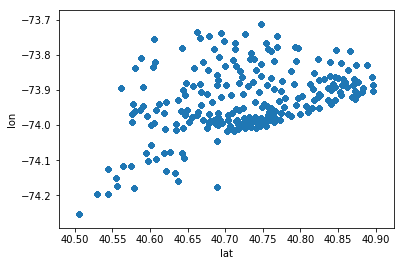

In [43]:
plt.figure(figsize=(12,12))
new_df.plot(kind='scatter',x='lat',y='lon',alpha=0.4);

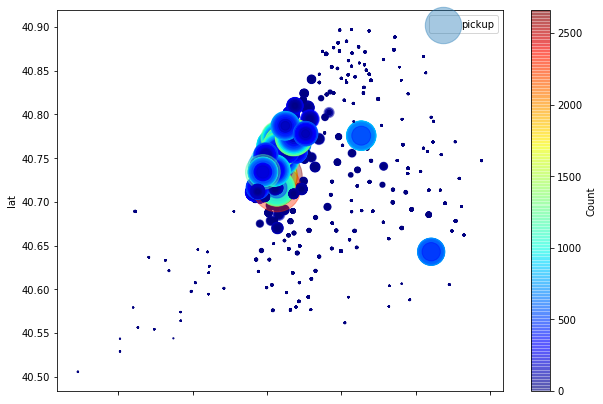

In [45]:
new_df.plot(kind="scatter", x="lon", y="lat",
    s=new_df['Count'], label="pickup",
    c="Count", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

In [55]:
temp_df= pd.DataFrame(new_df.groupby('PULocationID')['Count'].sum())

In [57]:
temp_df.reset_index(inplace=True)
temp_df['lat'] = 0
temp_df['lon'] = 0

In [58]:
for i in range(1,264):
    lat=zone_df[zone_df['LocationID'] == i].iloc[0,5]
    lon=zone_df[zone_df['LocationID'] == i].iloc[0,6]  
    temp_df.iloc[i-1,2] = lat
    temp_df.iloc[i-1,3] = lon 

In [59]:
temp_df.head()

,PULocationID,Count,lat,lon
0,1.0,1711.0,40.689064,-74.177255
1,2.0,70.0,40.603994,-73.835412
2,3.0,1179.0,40.862773,-73.843439
3,4.0,210703.0,40.725102,-73.979583
4,5.0,101.0,40.556413,-74.173504


In [87]:
temp_df['Count'].describe()

count    2.630000e+02
mean     3.804483e+05
std      8.758392e+05
min      0.000000e+00
25%      1.326000e+03
50%      4.045000e+03
75%      9.882500e+04
max      4.235975e+06
Name: Count, dtype: float64

In [88]:
temp_df['Count'].max()

4235975.0

In [48]:
import folium

In [99]:
folium_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=11,
                        tiles="CartoDB dark_matter")
# marker = folium.CircleMarker(location=[40.738, -73.98])
# marker.add_to(folium_map)


In [100]:
for index, row in temp_df.iterrows():
#     df = temp_df[temp_df['PULocationID'] == zone]
#     net_departures = (row["Departure Count"]-row["Arrival Count"])
#    print(radius)
    radius = row['Count']/1000
#     print(radius)
#     if radius>4:
#         color="#E37222" # tangerine
#     else:
#         color="#0A8A9F" # teal
#     radius = 10
#     color = "#E37222" 
    folium.CircleMarker(location=(row["lat"],
                                  row["lon"])
                       ).add_to(folium_map)

In [101]:
folium_map

In [11]:
drop_new_df = pd.DataFrame()
for zone in range(1,264):
    temp = complete_dropoff_2018_df[complete_dropoff_2018_df['DOLocationID'] == zone]
    temp['lat'] = zone_df.iloc[zone-1,5]
    temp['lon'] = zone_df.iloc[zone-1,6]
    
    drop_new_df = drop_new_df.append(temp)

In [12]:
drop_new_df.head()

,Unnamed: 0,datetime,apparentTemperature,summary,windSpeed,DOLocationID,dropoff_year,dropoff_month,dropoff_day,dropoff_hour,Count,lat,lon
0,0,2018-04-01 00:00:00,40.42,Clear,3.27,1.0,2018,4,1,0,0.0,40.689064,-74.177255
1,1,2018-04-01 01:00:00,45.16,Clear,2.28,1.0,2018,4,1,1,0.0,40.689064,-74.177255
2,2,2018-04-01 02:00:00,48.38,Clear,1.34,1.0,2018,4,1,2,2.0,40.689064,-74.177255
3,3,2018-04-01 02:00:00,51.37,Clear,1.68,1.0,2018,4,1,2,2.0,40.689064,-74.177255
4,4,2018-04-01 03:00:00,53.91,Clear,2.96,1.0,2018,4,1,3,5.0,40.689064,-74.177255


In [15]:
temp_df= pd.DataFrame(drop_new_df.groupby('DOLocationID')['Count'].sum())
temp_df.reset_index(inplace=True)


In [18]:
temp_df.tail()

,DOLocationID,Count
258,259.0,10677.0
259,260.0,110992.0
260,261.0,490910.0
261,262.0,1299337.0
262,263.0,1940292.0


In [19]:
temp_df.shape

(263, 2)

In [22]:
temp_df.rename(columns={'DOLocationID':'LocationID'},inplace=True)

In [26]:
pwd

'/home/jupyter/capstone'

In [23]:
temp_df=pd.merge(temp_df,zone_df,how='inner',on='LocationID')

In [24]:
temp_df.head()

,LocationID,Count,Borough,Zone,service_zone,New_Name,Latitude,Longitude
0,1.0,184994.0,EWR,Newark Airport,EWR,EWR_Newark_Airport,40.689064,-74.177255
1,2.0,58.0,Queens,Jamaica Bay,Boro Zone,Queens_Jamaica_Bay,40.603994,-73.835412
2,3.0,6990.0,Bronx,Allerton/Pelham Gardens,Boro Zone,Bronx_Allerton/Pelham_Gardens,40.862773,-73.843439
3,4.0,477777.0,Manhattan,Alphabet City,Yellow Zone,Manhattan_Alphabet_City,40.725102,-73.979583
4,5.0,688.0,Staten Island,Arden Heights,Boro Zone,Staten_Island_Arden_Heights,40.556413,-74.173504


In [29]:
temp_df.to_csv('/home/jupyter/capstone/complete_dropoff_tableau.csv')